# COVID-19 and Airline Stocks
## Lenix Carter

Herein, we explore the relationship between coronavirus cases and the valuation of airline stocks. 

##### Hypothesis
The value of airline stocks will go down massively in repsonse to increased reporting of coronavirus cases.

We import four libraries. Seaborn will be used to make a scatterplot with a line of best fit.

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns

We read in the reported coronavirus cases from January 22nd on. 

In [2]:
covid_cases = pd.read_csv('time_series_2019-ncov-Confirmed.csv', sep=",", header=0, index_col=1).drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,2,3,5,7,8,8,14,14,14,19,...,59,70,75,82,114,147,177,212,272,322
Japan,2,1,2,2,4,4,7,7,11,15,...,639,639,701,773,839,825,878,889,924,963
Singapore,0,1,3,3,4,5,7,7,10,13,...,178,178,200,212,226,243,266,313,345,385
Nepal,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Malaysia,0,0,0,3,4,4,4,7,8,8,...,149,149,197,238,428,566,673,790,900,1030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Netherlands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Niger,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Papua New Guinea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


While this is an incredible wealth of data it is way more than what we need.

All we need is the total number of cases and the dates of their occurrences. 

In [3]:
total_cases = pd.DataFrame(covid_cases.sum(), columns=["Number of Cases"])
total_cases.index = pd.to_datetime(total_cases.index, errors='coerce')
total_cases.index = pd.Series(total_cases.index).dt.strftime('%Y-%m-%d')
total_cases.head()

,Number of Cases
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118


We will begin with mapping the Delta Airlines stock data from January 22nd onward. This was retrieved from yahoo.com.

In [4]:
delta_stocks = pd.read_csv('DAL.csv', sep=",", header=0, index_col=0)
delta_stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-22,60.630001,60.720001,59.560001,59.639999,59.231194,7096400
2020-01-23,59.189999,60.380001,58.189999,60.270000,59.856876,7774500
2020-01-24,60.099998,60.209999,57.840000,58.810001,58.406887,10989500
2020-01-27,56.490002,57.180000,55.619999,56.830002,56.440460,13090200
2020-01-28,57.549999,57.970001,56.750000,57.480000,57.086002,6343700


Again, this is a bit much data. We choose to simplify to just the closing prices based on the assumption that most reported cases happen after 9am. 

In [5]:
delta_close = delta_stocks.iloc(axis=1)[3]
pd.DataFrame(delta_close.head())

,Close
Date,
2020-01-22,59.639999
2020-01-23,60.270000
2020-01-24,58.810001
2020-01-27,56.830002
2020-01-28,57.480000


Now, we now construct a DataFrame containing both the number of cases and the closing price. 

In [6]:
comparison = [total_cases["Number of Cases"], delta_close]
comparison = pd.concat(comparison, axis=1)
comparison.head()

,Number of Cases,Close
2020-01-22,555,59.639999
2020-01-23,653,60.270000
2020-01-24,941,58.810001
2020-01-25,1434,NaN
2020-01-26,2118,NaN


Next we graph this relationship.

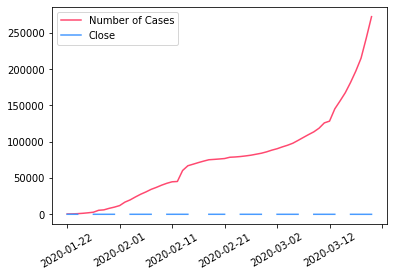

In [7]:
colors=["#ffea49", "#ff4970", "#499bff"]
comparison.plot(color=colors[1:3], rot=30)

This however is not particularly useful. Prices are obviously much lower than total cases. 

We observe the trend of Delta Airline closes from January 22nd on.

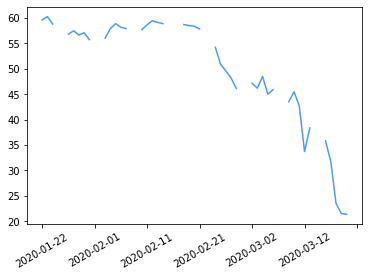

In [10]:
comparison["Close"].plot(color=colors[2], rot=30)

We build a scatter plot mapping the number of cases to the closing price.

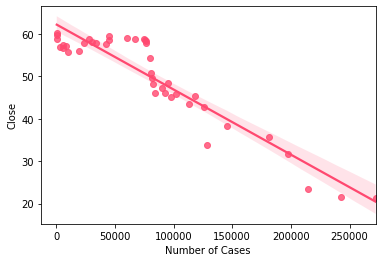

In [9]:
sns.regplot(comparison["Number of Cases"], comparison["Close"], color=colors[1])

Here is the negative correlation that we were expecting.

---

##### Conclusion
This is a really simple analysis. It is showing something that might seem incredibly obvious, but it was an interest that my new curio